In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
ply_str = pd.read_csv("playstore-analysis.csv")
ply_str.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
ply_str.shape

(10841, 13)

In [26]:
ply_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [27]:
ply_str.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [28]:
ply_str.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [29]:
ply_str.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Tasks

#### 1. Data clean up – Missing value treatment


##### a. Drop records where rating is missing since rating is our target/study variable

In [30]:
ply_str.dropna(axis = 0, how = 'any', subset = ['Rating'], inplace = True)
ply_str['Rating'].isnull().sum()

0

#### b. Check the null values for the Android Ver column.


###### i. Are all 3 records having the same problem?

In [31]:
ply_str[ply_str['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Yes all three records are having same problem.

##### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [32]:
ply_str.drop(axis = 0, index = 10472, inplace = True)
ply_str[ply_str['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [33]:
ply_str['Android Ver'].mode()[0]

'4.1 and up'

In [34]:
ply_str['Android Ver'].fillna(ply_str['Android Ver'].mode()[0], inplace = True)

In [35]:
ply_str[ply_str['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### c. Current ver – replace with most common value





We find the most common value with mode function.

In [36]:
ply_str['Current Ver'].mode()[0]

'Varies with device'

In [37]:
ply_str['Current Ver'].fillna(ply_str['Current Ver'].mode()[0], inplace = True)

In [38]:
ply_str[ply_str['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 2. Data clean up – correcting the data types



#### a. Which all variables need to be brought to numeric types?

Reviews and Installs need to be brought to numeric types.

#### b. Price variable – remove $ sign and convert to float

In [39]:
ply_str['Price']=ply_str['Price'].str.replace('$','').astype(np.float)
ply_str.head()

<ipython-input-39-72dfa40be4ce>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ply_str['Price']=ply_str['Price'].str.replace('$','').astype(np.float)
<ipython-input-39-72dfa40be4ce>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ply_str['Price']=ply_str['Price'].str.replace('$','').astype(np.float)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
ply_str.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [40]:
ply_str['Installs'] = ply_str['Installs'].str.replace('+','')
ply_str['Installs'] = ply_str['Installs'].str.replace(',','')

<ipython-input-40-f602954339e3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ply_str['Installs'] = ply_str['Installs'].str.replace('+','')


In [41]:
ply_str['Installs'] = ply_str['Installs'].astype(int)

In [42]:
ply_str.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
ply_str['Installs'].dtypes

dtype('int32')

#### d. Convert all other identified columns to numeric

In [44]:
ply_str['Reviews'] = ply_str['Reviews'].astype(float)
ply_str['Reviews'].dtypes

dtype('float64')

### 3. Sanity checks – check for the following and handle accordingly



#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.


#### i. Are there any such records? Drop if so.

In [45]:
ply_str.loc[ply_str.Rating < 1] & ply_str.loc[ply_str.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records with rating less than 1 or greater than 5.

#### b. Reviews should not be more than installs as only those who installed can review the app.
i. Are there any such records? Drop if so

In [46]:
ply_str.loc[ply_str['Reviews'] > ply_str['Installs']] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Yes there are 7 records where Reviews is greater than Installs

In [47]:
temp = ply_str[ply_str['Reviews'] > ply_str['Installs']].index

In [48]:
ply_str.drop(labels=temp, inplace=True)

In [49]:
ply_str.loc[ply_str['Reviews'] > ply_str['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 4. Identify and handle outliers – 


#### a. Price column



i. Make suitable plot to identify outliers in price

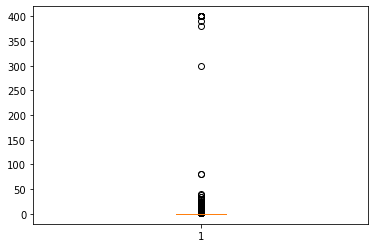

In [50]:
plt.boxplot(ply_str['Price'])
plt.show()

In [51]:
ply_str['Price'].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [53]:
ply_str.loc[ply_str['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


Yes except $200. 

In [55]:
df = ply_str.loc[ply_str['Price']>200].index
ply_str.drop(labels=df,inplace=True)

In [56]:
ply_str.loc[ply_str['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### iii. After dropping the useless records, make the suitable plot again to identify outliers

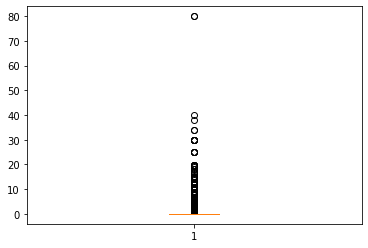

In [58]:
plt.boxplot(ply_str['Price'])
plt.show()

#### iv. Limit data to records with price < $30

In [61]:
ply_str.loc[ply_str['Price']>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214.0,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214.0,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6.0,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134.0,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [62]:
df1 = ply_str.loc[ply_str['Price']>30].index
ply_str.drop(labels=df1, inplace = True)

In [63]:
ply_str.loc[ply_str['Price']>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


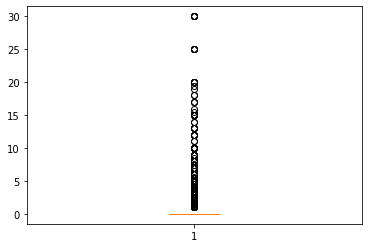

In [64]:
plt.boxplot(ply_str['Price'])
plt.show()

### b. Reviews column
#### i. Make suitable plot

C:\Python new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


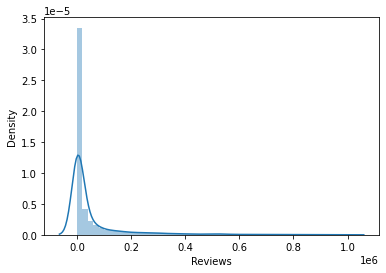

In [82]:
sns.distplot(ply_str['Reviews'])
plt.show()

#### ii. Limit data to apps with < 1 Million reviews

In [66]:
lmtdt_1M = ply_str[ply_str['Reviews']>1000000].index 

In [67]:
ply_str.drop(labels=lmtdt_1M, inplace = True)
print(lmtdt_1M.value_counts().sum(),'cols droped')

704 cols droped


#### c. Installs
##### i. What is the 95th percentile of the installs?

In [68]:
q_95 = np.quantile(ply_str['Installs'],0.95)
print(q_95,'is 95th percentile of Insatalls')

10000000.0 is 95th percentile of Insatalls


#### ii. Drop records having a value more than the 95th percentile

In [69]:
df2 = ply_str[ply_str['Installs']>q_95].index
ply_str.drop(labels=df2, inplace = True)
print(df1.value_counts().sum(),'cols are droped')

6 cols are droped


## Data analysis to answer business questions


### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?


#### a. How do you explain this?

C:\Python new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


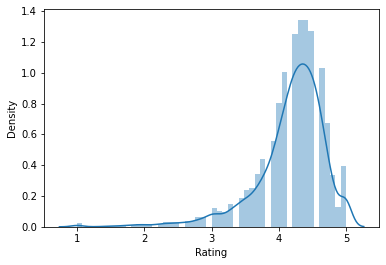

The skewness of this distribution is -1.7434270330647985
The meadian of this distribution 4.3 is greatr than mean 4.170800237107298 of this distrubution


In [70]:
sns.distplot(ply_str['Rating'])
plt.show()
print('The skewness of this distribution is', ply_str['Rating'].skew())
print('The meadian of this distribution {} is greatr than mean {} of this distrubution'.format(ply_str.Rating.median(),ply_str.Rating.mean()))

#### b. What is the implication of this on your analysis?

In [71]:
ply_str['Rating'].mode()[0]

4.3

mode>=median>mean,the distribution of Rating is negatively skewed towards lower values.

### 6. What are the top Content Rating values?


#### a. Are there any values with very few records?

In [72]:
ply_str['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Everyone is the top content rating values.

Adults only 18+ and Unrated are values with very few records.

#### b. If yes, drop those as they won’t help in the analysis

In [73]:
ply_str['Content Rating']=ply_str['Content Rating'].replace('Adults only 18+','NaN').replace('Unrated','NaN')
df2 = ply_str[ply_str['Content Rating']=='NaN'].index
ply_str.drop(labels=df2,inplace = True)
ply_str['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

Adults only 18+ and Unrated are values with very few records so drop them.

### 7. Effect of size on rating


#### a. Make a joinplot to understand the effect of size on rating

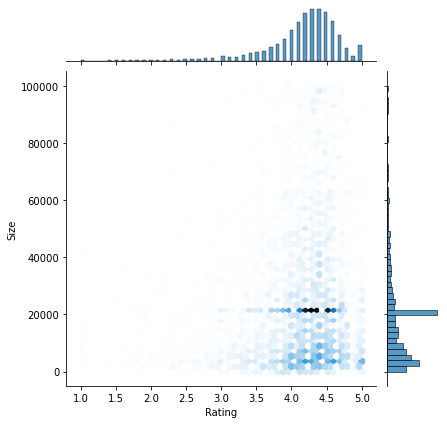

In [74]:
sns.jointplot(y='Size', x='Rating', data=ply_str, kind='hex')
plt.show()

#### b. Do you see any patterns?
Yes pattern can be observed between Size and Rating, their is correlation between Size and Rating.

#### c. How do you explain the pattern?

Generally on increasing Rating, Size of app also increase.But this is not always true,for higher Rating their is constant app Size.Thus we can conclude that their is positive correlation between Size and Rating.  


### 8. Effect of price on rating


#### a. Make a jointplot (with regression line)

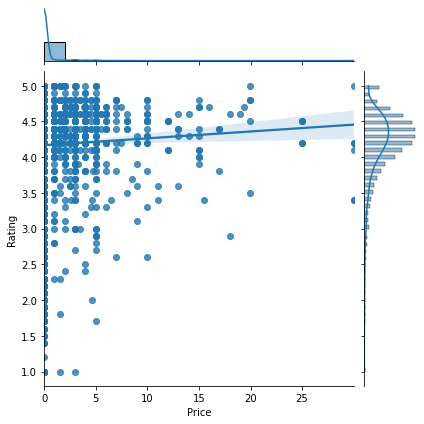

In [75]:
sns.jointplot(x='Price', y='Rating', data=ply_str, kind='reg')
plt.show()

#### b. What pattern do you see?


Generally incresing the Price, Rating remain almost constant greater than 4.

#### c. How do you explain the pattern?

Since on increasing the Price, Rating remain almost grater than 4 thus it can be concluded that their is very week positive correlation between Rating and Price.

In [77]:
ply_str.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


#### d. Replot the data, this time with only records with price > 0

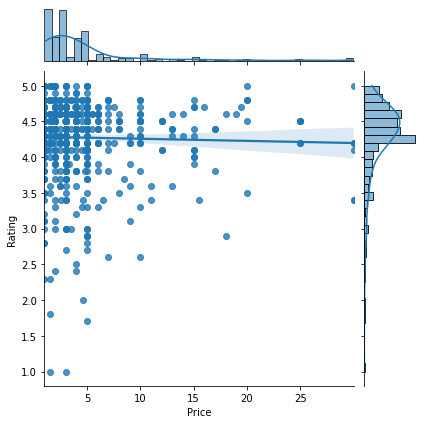

In [78]:
df4 = ply_str.loc[ply_str.Price>0]
sns.jointplot(x='Price', y='Rating', data=df4,kind='reg')
plt.show()

#### e. Does the pattern change?

Yes, on limiting the records with Price>0,the overall pattern change slight,their is very negative correlation 
between Price and Rating

#### f. What is your overall inference on the effect of price on the rating

Genarrly increasing on the Price, doesnot have significant effect on higher Rating.For higher Price, Rating is high and almost constant grater than 4. 

### 9. Look at all the numeric interactions together – 


#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

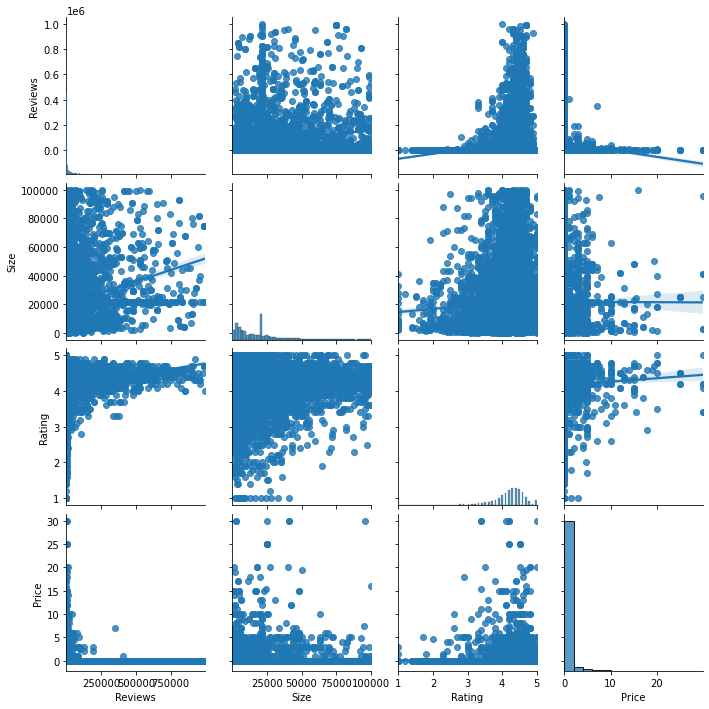

In [80]:
sns.pairplot(ply_str, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

### 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating

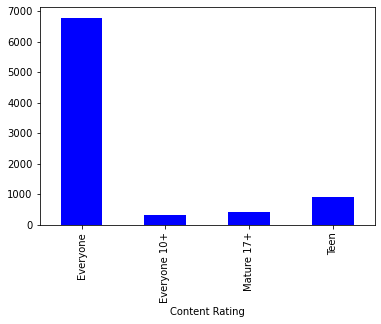

In [85]:
ply_str.groupby(['Content Rating'])['Rating'].count().plot.bar(color='blue')
plt.show()

#### b. Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having outliers in Rating. Because in case of outliers, Median is the best measure for central tendacy.

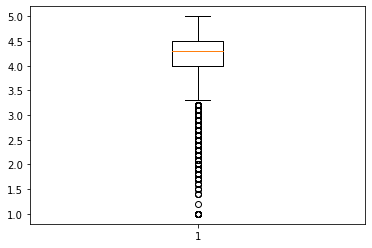

In [84]:
plt.boxplot(ply_str['Rating'])
plt.show()

#### c. Choose the right metric and plot

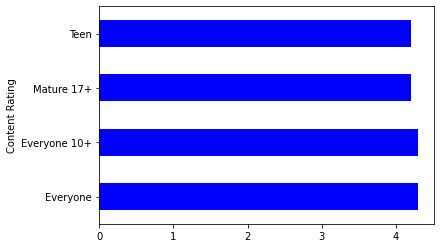

In [88]:
ply_str.groupby(['Content Rating'])['Rating'].median().plot.barh(color='blue')
plt.show()

### 11. Content rating vs. size vs. rating – 3 variables at a time


#### a. Create 5 buckets (20% records in each) based on Size

In [92]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
ply_str['Bucket Size']=pd.cut(ply_str['Size'], bins, labels=['0-20k', '20k-40k', '40k-60k','60k-80k','80k-100k'])
pd.pivot_table(ply_str, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


##### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [93]:
df5 =pd.pivot_table(ply_str, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
df5

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


#### c. Make a heatmap of this


#### i. Annotated

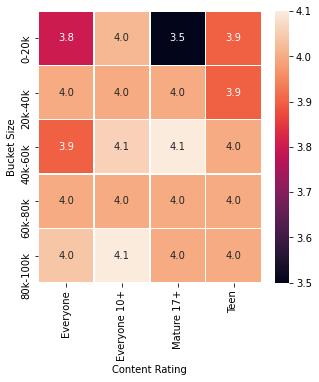

In [94]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(df5, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

#### ii. Greens color map

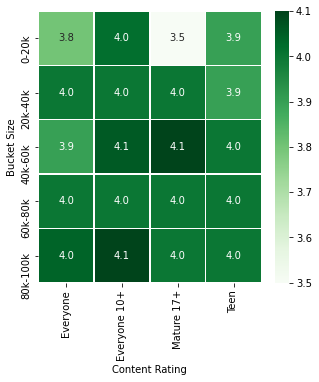

In [99]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(df5, annot=True, linewidths=.5, cmap='Greens', fmt='.1f', ax=ax)
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. So in general we can conclude that havier apps are preferred in all categories.